Loading and preprocessing data...
Building convolutional autoencoder...


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 7, 7, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_4 (UpSampling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,353 (110.75 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

Training autoencoder...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.7965 - loss: 0.2079 - val_accuracy: 0.8140 - val_loss: 0.0762
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.8149 - loss: 0.0757 - val_accuracy: 0.8142 - val_loss: 0.0719
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.8148 - loss: 0.0723 - val_accuracy: 0.8143 - val_loss: 0.0701
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.8153 - loss: 0.0705 - val_accuracy: 0.8144 - val_loss: 0.0689
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8151 - loss: 0.0693 - val_accuracy: 0.8144 - val_loss: 0.0681
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.8151 - loss: 0.0686 - val_accuracy: 0.8144 - val_loss: 0.0675
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.8156 - loss: 0.0678 - val_accuracy: 0.8144 - val_loss: 0.0670
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 

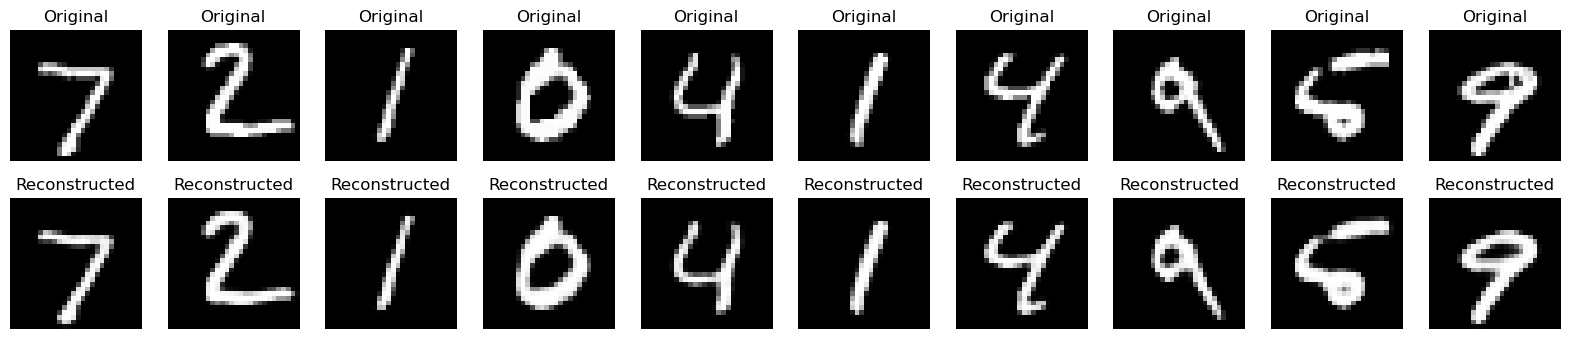

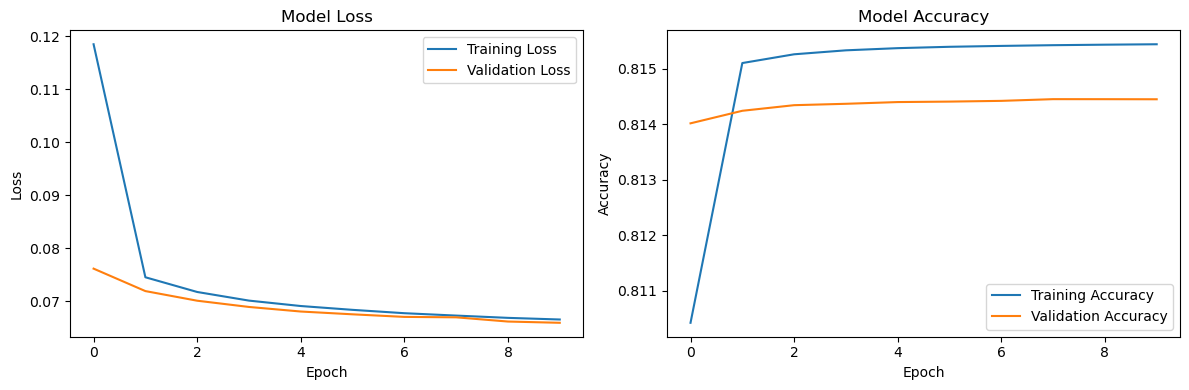

Autoencoder training and evaluation complete!


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

# Step 1: Prepare data
print("Loading and preprocessing data...")
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Step 2: Build model with corrected architecture
print("Building convolutional autoencoder...")
def build_convolutional_autoencoder():
    input_img = Input(shape=(28, 28, 1))
    
    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)  # 14x14
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)  # 7x7
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)  # 4x4
    
    # Decoder - need to ensure output shape matches input (28x28)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)  # 8x8
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)  # 16x16
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)  # 32x32 - too big!
    
    # Add cropping to get back to 28x28
    # Instead, let's use a different approach with proper padding
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    
    return Model(input_img, decoded)

# Let's build a more careful architecture
def build_correct_autoencoder():
    input_img = Input(shape=(28, 28, 1))
    
    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)  # 14x14
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)  # 7x7
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)  # 4x4
    
    # Decoder with careful upsampling
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)  # 8x8
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)  # 16x16
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)  # 32x32
    
    # Crop to 28x28 if needed, or use a better architecture
    # Let's use a different approach with proper layer sizes
    
    return Model(input_img, x)

# Alternative approach: Use a simpler architecture that maintains proper shapes
def build_simple_autoencoder():
    input_img = Input(shape=(28, 28, 1))
    
    # Encoder
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)  # 14x14
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)  # 7x7
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)  # 4x4
    
    # Decoder
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)  # 8x8
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)  # 16x16
    x = Conv2D(16, (3, 3), activation='relu')(x)  # No padding to reduce size
    x = UpSampling2D((2, 2))(x)  # 32x32
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)  # 32x32
    
    return Model(input_img, decoded)

# Let's use a better approach with proper output shape
def build_proper_autoencoder():
    input_img = Input(shape=(28, 28, 1))
    
    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)  # 14x14
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)  # 7x7
    
    # Decoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)  # 14x14
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)  # 28x28 - perfect!
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    
    return Model(input_img, decoded)

# Build the corrected model
autoencoder = build_proper_autoencoder()
autoencoder.summary()

# Step 3: Compile model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), 
                   loss='binary_crossentropy', 
                   metrics=['accuracy'])

# Step 4: Train model
print("Training autoencoder...")
history = autoencoder.fit(x_train, x_train,
                         epochs=10,  # Reduced epochs for demonstration
                         batch_size=128,
                         shuffle=True,
                         validation_data=(x_test, x_test))

# Step 5: Predict and visualize
print("Making predictions...")
decoded_imgs = autoencoder.predict(x_test)

# Plot results
def plot_results(original, reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        ax.axis('off')
        
        # Reconstructed
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.title("Reconstructed")
        ax.axis('off')
    plt.show()

plot_results(x_test, decoded_imgs)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

print("Autoencoder training and evaluation complete!")